In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cost of carry model
- use costs to calculate fair price

In [4]:
df = pd.read_csv('N225.csv')

In [5]:
df

,N225index,ContrYr,Date,Time,FutPrice,Days_to_mat
0,17479.57,1999,19990901,141737,17740,98
1,17630.32,1999,19990902,142445,17645,97
2,17559.40,1999,19990903,142444,17515,96
3,17664.06,1999,19990906,142457,17790,93
4,17651.94,1999,19990907,142456,17690,92
5,17509.73,1999,19990908,142456,17565,91
6,17677.28,1999,19990909,142454,17740,90
7,17589.05,1999,19990910,142455,17685,89
8,17735.60,1999,19990913,142504,17880,86
9,17610.31,1999,19990914,142500,17580,85


In [6]:
futpr=df['FutPrice']
spotpr=df['N225index']
ttm=df['Days_to_mat']/365

In [10]:
# when futpr > spotpr, it means future price is expected to be higher than current price
### transactions cost 0.5% (brokerage and exchange fees), N225 portfolio aggregate dividend was 1.0% p.a., 
### Japanese riskfree rate was 0.5% p.a.
### 1.01 factor to represent slight premium due to positive future price expectation
### 0.99 factor for negative future price expectation

fairpr = [0] * 30

for i in range(30):
  if futpr[i] > spotpr[i]:
    fairpr[i] = 1.01*(spotpr[i] - 0.01*spotpr[i]*ttm[i]/(1+0.005*ttm[i]))*(1+0.005*ttm[i])
  else: 
    fairpr[i] = 0.99*(spotpr[i]- 0.01*spotpr[i]*ttm[i]/(1+0.005*ttm[i]))*(1+0.005*ttm[i])


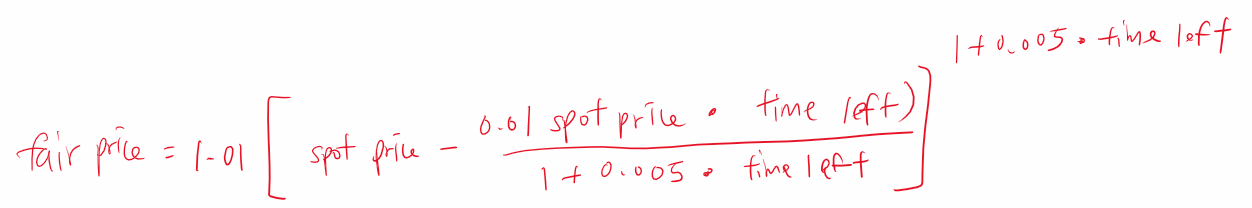

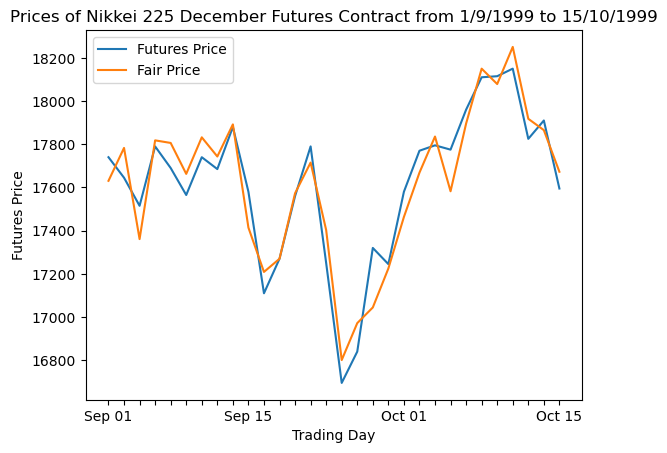

In [11]:

time = np.array(range(len(df['Time'])))
plt.plot(time, futpr)
plt.plot(time, fairpr)
plt.xticks(np.arange(30), ['Sep 01','','','','','','','','','Sep 15','','','','','','','','','','Oct 01','',
                           '','','','','','','','','Oct 15'])
plt.xlabel('Trading Day')
plt.ylabel('Futures Price')
plt.title('Prices of Nikkei 225 December Futures Contract from 1/9/1999 to 15/10/1999')
plt.legend(['Futures Price', 'Fair Price'])
plt.show()

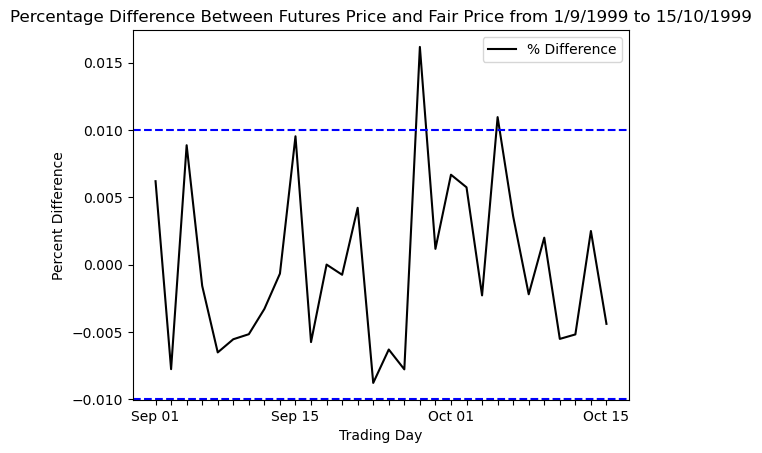

In [12]:
p=(futpr-fairpr)/fairpr
plt.plot(time, p,color='black')
plt.xticks(np.arange(30), ['Sep 01','','','','','','','','','Sep 15','','','','','','','','','','Oct 01','',
                           '','','','','','','','','Oct 15'])
plt.xlabel('Trading Day')
plt.ylabel('Percent Difference')
plt.axhline(y = 0.01, color = 'b', linestyle = '--')
plt.axhline(y = -0.01, color = 'b', linestyle = '--')
plt.title('Percentage Difference Between Futures Price and Fair Price from 1/9/1999 to 15/10/1999')
plt.legend(['% Difference'])
plt.show()

# Why let Y=np.log(futpr/fairpr), instead of Y=futpr/fairpr
- use log return for continuous compounding, use simple return for discrete compounding
- easier to find cum return
    - e.g. 100, inc 10%, dec 10%
    - cum return = sum(daily log returns)
        - ln(110/100) + ln(99/110) = -0.01005 = -1.005%
        - final value = 100 * (100% - 1.005%) = 98.99
    - cum return = multiply the daily returns (plus one) and then subtract one to get the total return. 
        - final value = 100*1.1*0.9 = 99 
- reduce effect of extreme values which make statistical models less sensitive to outliers

In [18]:
# Example of symmetry
price_initial = 100
price_gain = price_initial * 1.10  # 10% gain
price_loss = price_gain * 0.90     # 10% loss from the increased price

# correct final value = 100 * 1.10 * 0.9 = 99

# Simple returns calculation assume price change happen discretely
simple_return_gain = (price_gain - price_initial) / price_initial
simple_return_loss = (price_loss - price_gain) / price_gain
cumulative_simple_return = (price_loss - price_initial) / price_initial

# Logarithmic returns calculation assume price change happen continously
log_return_gain = np.log(price_gain / price_initial)
log_return_loss = np.log(price_loss / price_gain)
cumulative_log_return = log_return_gain + log_return_loss

cumulative_simple_return, cumulative_log_return
print('final value, simple discrete return = ', price_initial*(1+cumulative_simple_return))
print('final value, continuous discrete return = ', price_initial*(1+cumulative_log_return))

final value, simple discrete return =  99.00000000000001
final value, continuous discrete return =  98.99496641464987


In [20]:
Y=np.log(futpr/fairpr) 
'''
use log return instead of simple return
(1) log return represents continuous compounding, and simple return represents discrete compounding
(2) cum log return use addition, cum simple return multiplication, hence cum log return is faster
(3) log return reduce effect of outlier which is good for statistical analysis
'''
Y.head()

0    0.006182
1   -0.007788
2    0.008835
3   -0.001571
4   -0.006535
Name: FutPrice, dtype: float64

In [22]:
dY=(Y-Y.shift(1)).dropna()
dY.head()

1   -0.013971
2    0.016623
3   -0.010406
4   -0.004964
5    0.000984
Name: FutPrice, dtype: float64

In [24]:
dY0=dY[1:,]
dY0.head()

2    0.016623
3   -0.010406
4   -0.004964
5    0.000984
6    0.000377
Name: FutPrice, dtype: float64

In [25]:
dY1=dY.shift(1).dropna()   ### dY1 is lagged one period dY0
dY1.head()

2   -0.013971
3    0.016623
4   -0.010406
5   -0.004964
6    0.000984
Name: FutPrice, dtype: float64

In [13]:
y = dY0 # today's price change
x = dY1 # yesterday's price change
 
x = x.tolist()
y = y.tolist()
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     13.99
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           0.000916
Time:                        01:59:24   Log-Likelihood:                 97.874
No. Observations:                  28   AIC:                            -191.7
Df Residuals:                      26   BIC:                            -189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.543e-05      0.001      0.032      0.9

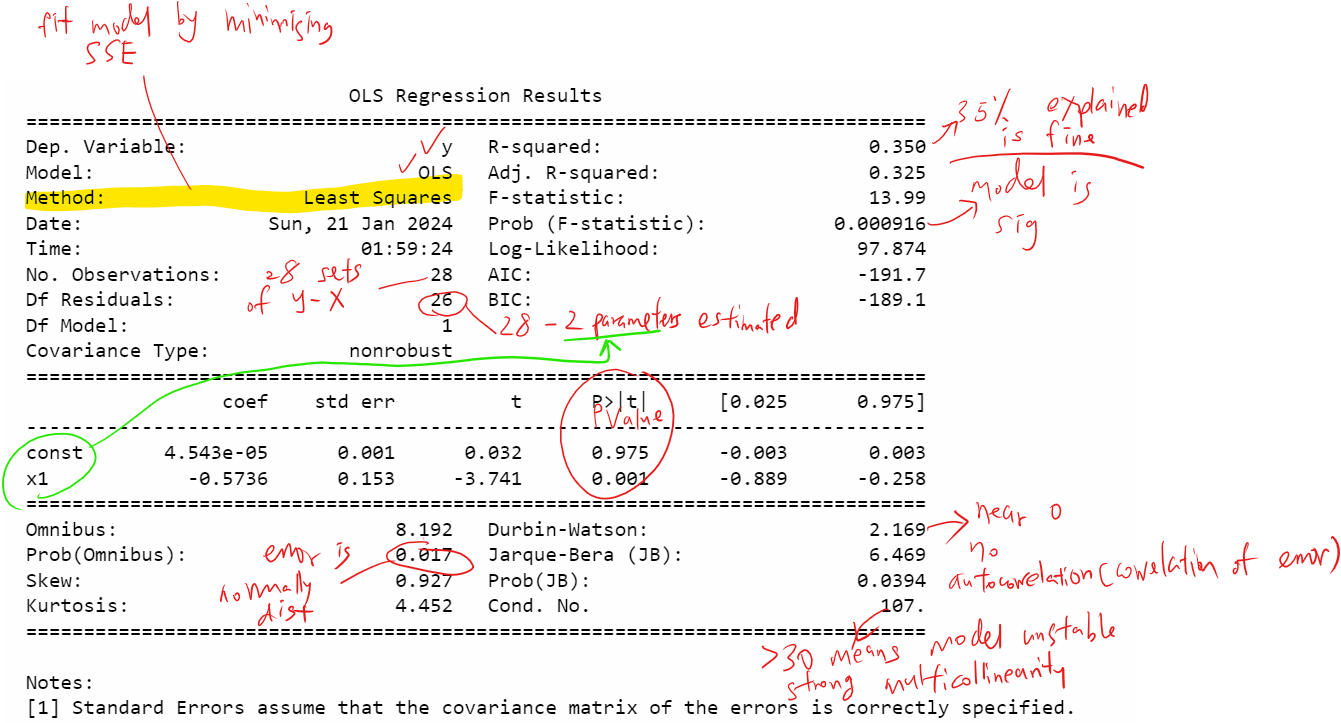

# LongStock-ShortFuture-Hedged-Portfolio
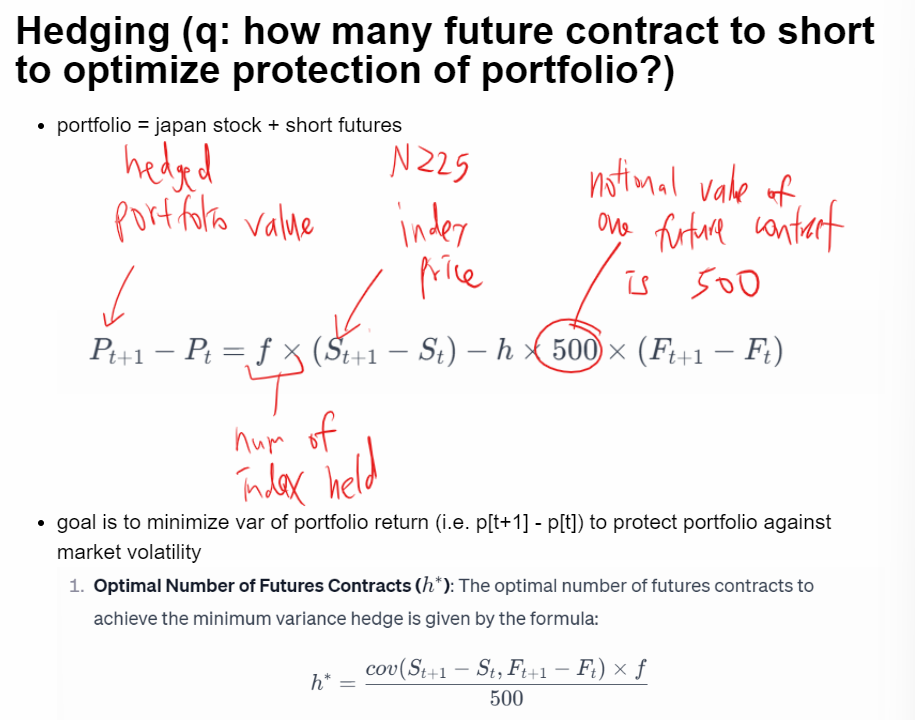

In [26]:
### Current N225 Index on 1 Sep is 17479.57; suppose portfolio value is 10 billion Yen to be hedged, f = 10B/17479.57 
f = round(10000000000/17479)
f

572115

In [27]:
spotpr.head()

0    17479.57
1    17630.32
2    17559.40
3    17664.06
4    17651.94
Name: N225index, dtype: float64

In [28]:
futpr.head()

0    17740
1    17645
2    17515
3    17790
4    17690
Name: FutPrice, dtype: int64

In [30]:
CS=(spotpr-spotpr.shift(1)).dropna()
CF=(futpr-futpr.shift(1)).dropna()
CF = sm.add_constant(CF)
result2 = sm.OLS(CS, CF).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              N225index   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     59.66
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           2.63e-08
Time:                        13:22:26   Log-Likelihood:                -181.12
No. Observations:                  29   AIC:                             366.2
Df Residuals:                      27   BIC:                             369.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6663     24.020      0.194      0.8

In [32]:
beta = result2.params[1]
beta

C:\Users\adam chem\AppData\Local\Temp\ipykernel_26816\3181248361.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = result2.params[1]


0.7157503979052208

In [31]:
beta = result2.params[1]
optimal_h = beta*f/500 
print('optimal_h = ',optimal_h)

optimal_h =  818.9830777950907


C:\Users\adam chem\AppData\Local\Temp\ipykernel_26816\2209769069.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = result2.params[1]
